Loading the titanic dataset and doing necessar preprocessing

In [40]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the data

titanic=pd.read_csv('titanic_dataset_1908.csv')


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Setting PassengerId as index column

In [5]:
titanic.set_index('PassengerId',inplace=True)

In [6]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Handling missing values

In [10]:
#As per info columns 'Age','Cabin' and 'Embarked' have null values
# Being a categorical variable,missing values in  'Embarked' can be filled with mode of the column
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [12]:
#Column Embarked has too many missing values.It is not advisable to fill it with mode values ,as avaialble data is less.SO we can replace null with 'Missing'
titanic['Cabin'].fillna('Missing',inplace=True)

In [13]:
# For column 'Age',we have to see whether data is missing in random or any dependence on other columns
titanic.groupby(titanic['Age'].isnull()).agg(['mean','count'])


C:\Users\Sunitha\AppData\Local\Temp\ipykernel_12920\76212361.py:2: FutureWarning: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  titanic.groupby(titanic['Age'].isnull()).agg(['mean','count'])


Survived          Pclass              Age           SibSp        \
           mean count      mean count       mean count      mean count   
Age                                                                      
False  0.406162   714  2.236695   714  29.699118   714  0.512605   714   
True   0.293785   177  2.598870   177        NaN     0  0.564972   177   

          Parch             Fare        
           mean count       mean count  
Age                                     
False  0.431373   714  34.694514   714  
True   0.180791   177  22.158567   177

In [14]:
oth_col = ['Pclass','Sex']
titanic['Age'] = titanic['Age'].fillna(titanic.groupby(oth_col)['Age'].transform('mean'))
titanic[titanic.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [15]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Handling outliers

In [17]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

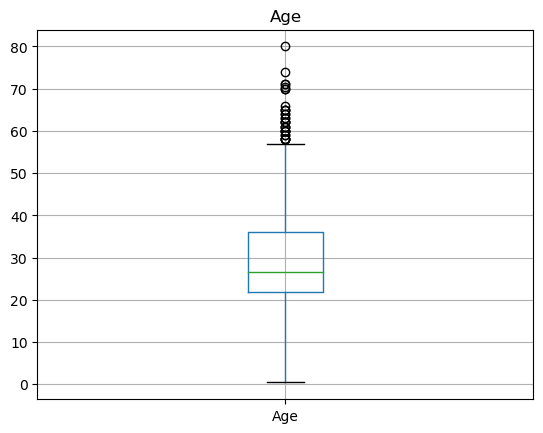

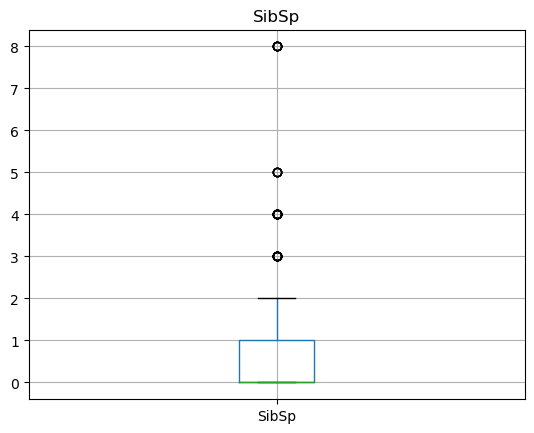

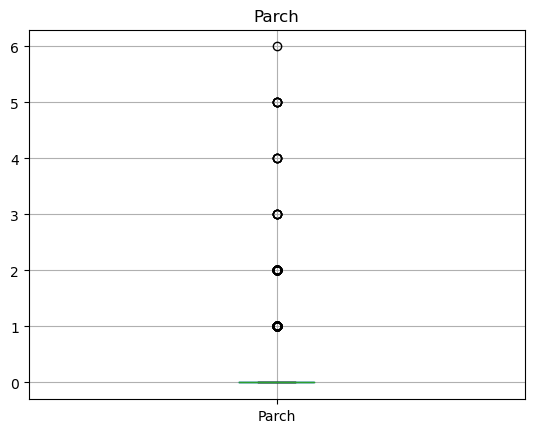

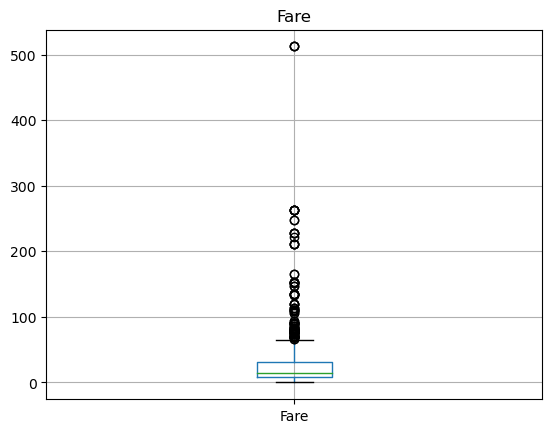

In [18]:
for i in ['Age','SibSp','Parch','Fare']:
    plt.show()
    titanic.boxplot(i)
    plt.title(i)

In [19]:
titanic['Age'].describe()

count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_12920\3677708691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])


<Axes: xlabel='Age', ylabel='Density'>

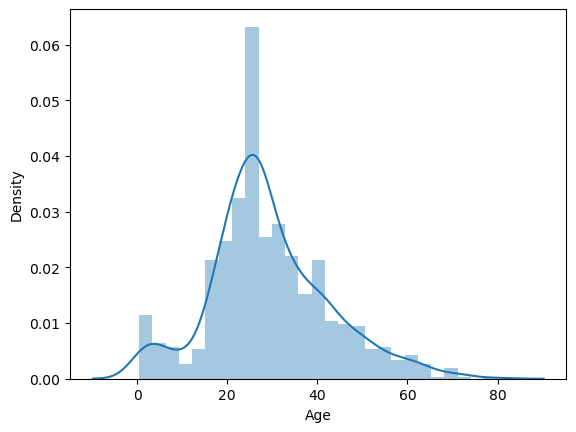

In [20]:
sns.distplot(titanic['Age'])

In [22]:
# Treating the outliers
#Inter quartile range and upper and lower limit calculated

Q1=titanic['Age'].quantile(0.25)
Q3=titanic['Age'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

#Outliers lying above upper limit is substitued with upper limit value and those lying below lower limit  is subtituted with lower limit value  

titanic['Age']=np.where(titanic['Age']>upper,upper,titanic['Age'])
titanic['Age']=np.where(titanic['Age']<lower,lower,titanic['Age'])

<Axes: >

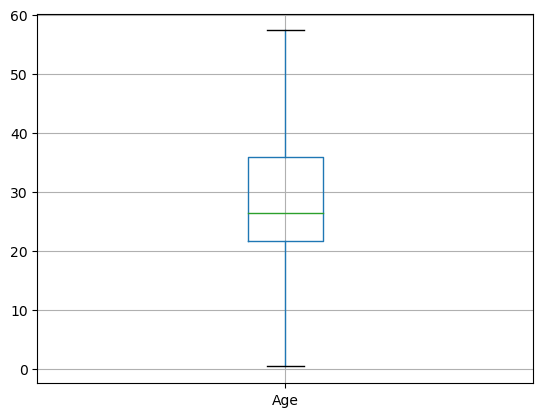

In [23]:
titanic.boxplot('Age')

In [24]:
# Treating the outliers in column'Fare'
#Inter quartile range and upper and lower limit calculated

Q1=titanic['Fare'].quantile(0.25)
Q3=titanic['Fare'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

#Outliers lying above upper limit is substitued with upper limit value and those lying below lower limit  is subtituted with lower limit value  

titanic['Fare']=np.where(titanic['Fare']>upper,upper,titanic['Fare'])
titanic['Fare']=np.where(titanic['Fare']<lower,lower,titanic['Fare'])

<Axes: >

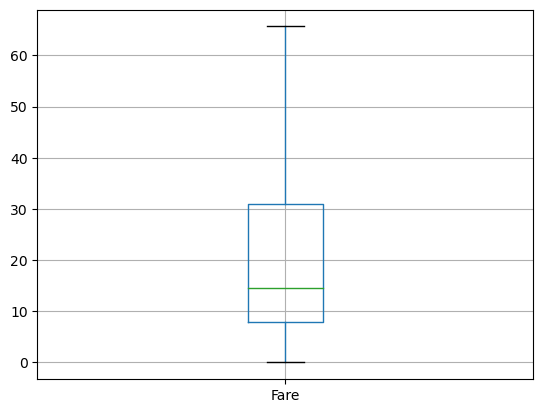

In [25]:
titanic.boxplot('Fare')

In [26]:
for i in ['Age','SibSp','Parch','Fare']:
    print(i,titanic[i].skew())
    

Age 0.23774439015793927
SibSp 3.6953517271630565
Parch 2.7491170471010933
Fare 1.082178592000912


In [27]:
#Next we will consider outliers in column 'Parch' and 'SibSp'
titanic['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [28]:
titanic['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_12920\4011918985.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['SibSp'])


<Axes: xlabel='SibSp', ylabel='Density'>

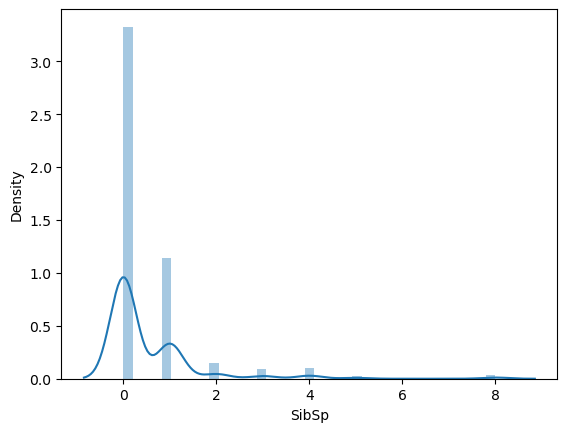

In [29]:
#From above information,in Parch column,3r quantile is 0,so we will consider SibSP column
sns.distplot(titanic['SibSp'])

In [30]:
# from the above info Parch column can not be treated,so we will proceed with SibSp  column
Q1=titanic['SibSp'].quantile(0.25)
Q3=titanic['SibSp'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR

print(Q1,Q3,IQR,round(upper))


0.0 1.0 1.0 2


In [31]:
#Substitute values greater than Q3 with Q3
titanic['SibSp']=np.where(titanic['SibSp']>upper,round(upper),titanic['SibSp'])

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_12920\360708363.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['SibSp'])


<Axes: xlabel='SibSp', ylabel='Density'>

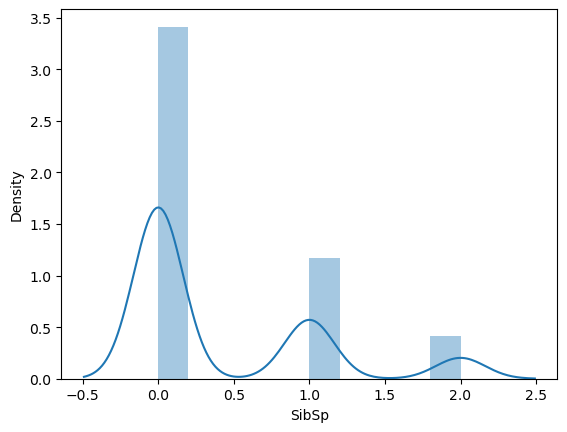

In [32]:
sns.distplot(titanic['SibSp'])

<Axes: >

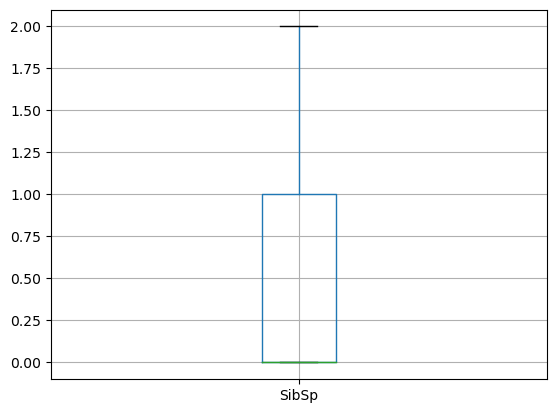

In [33]:
titanic.boxplot('SibSp')

MinMax scaling on dataset.
Select columns Age and Fare as other columns are either categorical values or having discrete values only

In [36]:
col=titanic[['Age','Fare']]
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
col_scaled=mms.fit_transform(col)
df_scaled=pd.DataFrame(col_scaled,columns=['Age','Fare'])

In [37]:
df_scaled.head()

,Age,Fare
0,0.378896,0.110460
1,0.659819,1.000000
2,0.449127,0.120745
3,0.607146,0.809027
4,0.607146,0.122649


In [38]:
titanic[['Age','Fare']]=df_scaled[['Age','Fare']]

In [39]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,0.659819,1,0,A/5 21171,1.000000,Missing,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.449127,1,0,PC 17599,0.120745,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,0.607146,0,0,STON/O2. 3101282,0.809027,Missing,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.607146,1,0,113803,0.122649,C123,S
5,0,3,"Allen, Mr. William Henry",male,0.458039,0,0,373450,0.128870,Missing,S




 Following steps were done
1) Loaded titanic dataset
2) Made PassengerId as index 
3) Analysed data using describe function and checked for null values 
4) 3 columns Age,Cabin and Embarked had missing values. 
5) Embarked being categorical value filled with mode of the column 
6) Cabin had lot of missing values.So it was not ideal to fill with mode or any other statistical value.Deleting the column was not advisable as it may contribute to analysing Survived data.So null values were replaced with 'missing'. 
7) 'Age' column was checked for whether data was missing in random way or in a systematic way.Missing values of age was filled by grouping columns Sex and Pclass and taking average of each group and filled in each category. 
8) Outliers were checked using plots.Age,Fare and SibSp outliers were clipped using IQR.
9) Minmax scaling done for columns Age and Fare as only these were the relevant columns to be scaled